In [8]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve, root
from scipy.integrate import solve_ivp
import time

Method: RK23 , Iterations: (98, 314), Time: 170.89ms


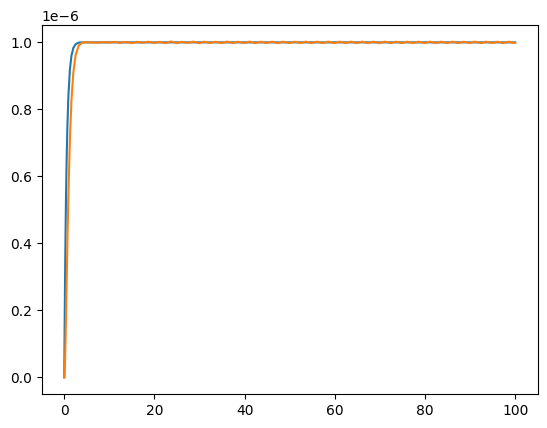

In [10]:
def twotanks(t,cs,c0,cin):
    # TWOTANKS is a model of two tank
    # in series describing the
    # concentration variation
    #parameter

    #c = np.array([c1,c2]).T
    c = cs*c0

    q = 1
    Vtot = 1
    V1 = 0.5
    V2 = Vtot-V1
    
    #equations
    M = np.array([[-q/V1, 0],
                 [q/V2, -q/V2]])
    b = np.array([q/V1,0])
    dcdt = M@c + b*cin
    dcsdt = dcdt/c0
    return dcsdt

def simTank():

    cin = 1e-6
    ci = np.zeros(2)
    c0 = np.ones(2)*cin
    csi= ci/c0
    

    tspan = [0,100]
    methods = ["RK23"]
    
    tic = time.time()
    sol = solve_ivp(lambda t,c: twotanks(t,c,c0,cin), tspan, csi, method = methods[0], rtol=1e-3, atol=1e-6)
    toc = time.time() - tic
    t = sol.t
    sol.y = (sol.y.T*c0).T

    print(f'Method: {methods[0]:5s}, Iterations: {len(t),sol["nfev"]}, Time: {toc*1000:.2f}ms')
    fig,ax = plt.subplots()
    ax.plot(t, sol.y[0])
    ax.plot(t,sol.y[1])


simTank()

